# Introduction

In this we will analyse the link between life expectancy and GDP as time progresses.

    Part 1: Data processing
    Part 2: Plots and analasys
    Part 3: Interpretation

Here are a few questions we will find answers too:
    
    1. How has llife expectancy evolved over time in the six nations?
    
    2. How has GDP evolved over time in the six nations?
    
    3. What is the correlation between GDP and life expectancy of a country?
    
    4. What is the average life expectancy in these nations,
    
    5. How is life expectancy distributed?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


In [36]:
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd

## Part 1: Cleaning

In [37]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [38]:
df.info() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [39]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [40]:
df.shape

(96, 4)

Column names have been lowered for convenience and "life expectancy at birth (years)" becomes "leb"

In [41]:
print(df.Country.unique())
print(df.Year.unique())

df = df.rename({"Life expectancy at birth (years)": "leb"}, axis="columns")
df = df.rename(str.lower, axis="columns")
df.head()

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


,country,year,leb,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Part 2: Plotting

### Q1

c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

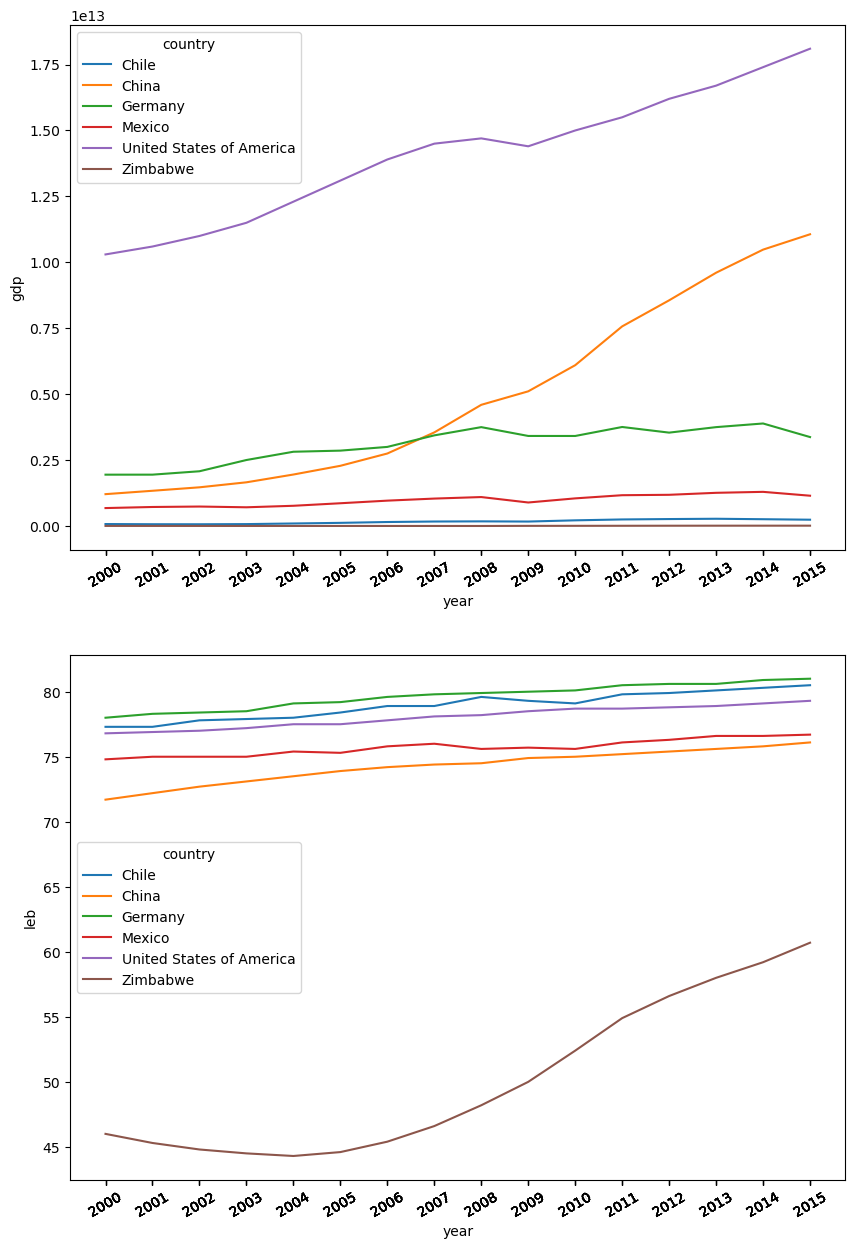

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 15))

ax1 = plt.subplot(2,1,1)
sns.lineplot(df, x='year', y='gdp', hue='country')
ax1.set_xticks(df.year)
ax1.set_xticklabels(df.year, rotation=30)

ax2 = plt.subplot(2,1,2)
sns.lineplot(df, x='year', y='leb', hue='country')
ax2.set_xticks(df.year)
ax2.set_xticklabels(df.year, rotation=30)

plt.show()
plt.clf()


Something seems a little off regarding the gdp growth, let's look at every country on it s own plot


c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

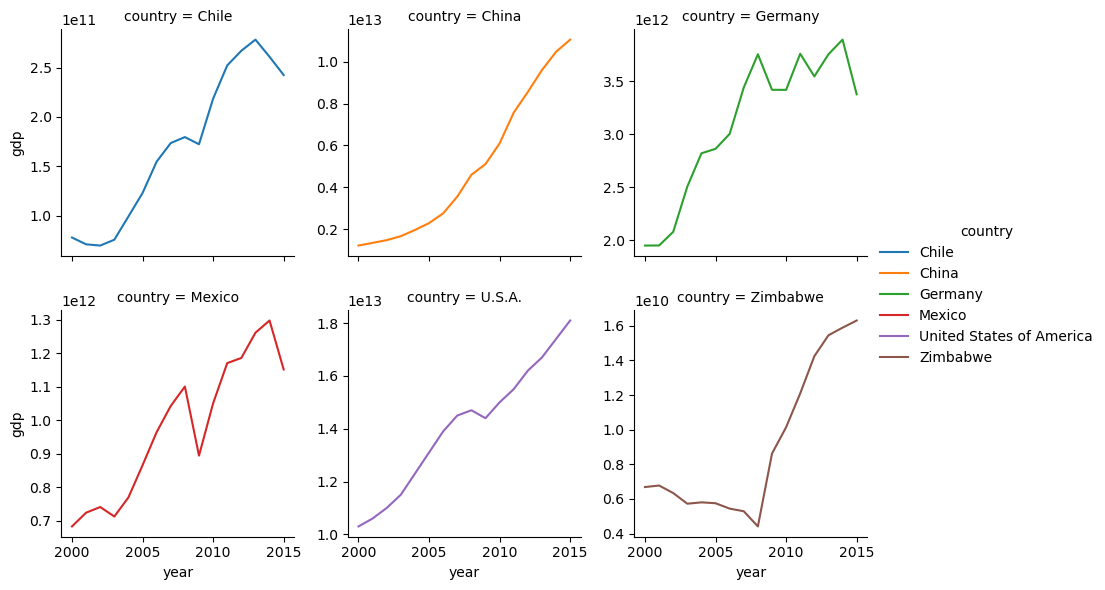

<Figure size 640x480 with 0 Axes>

In [76]:
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                         hue="country", sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "year", "gdp",)
            .add_legend()
            )

graphGDP.axes[4].set_title("country = U.S.A.", fontsize="medium")

plt.show()
plt.clf()

### Q2 and Q3


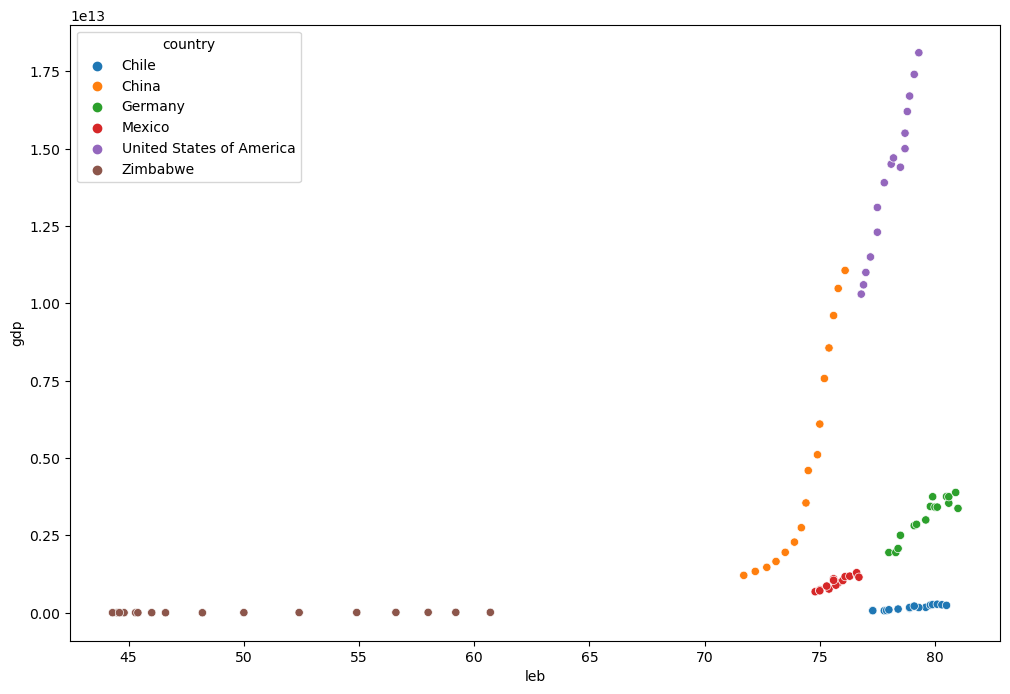

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot()
sns.scatterplot(df, x='leb', y='gdp', hue='country')


plt.show()
plt.clf()

country
Chile                       0.949877
China                       0.908526
Germany                     0.932699
Mexico                      0.932238
United States of America    0.981709
Zimbabwe                    0.966200
dtype: float64


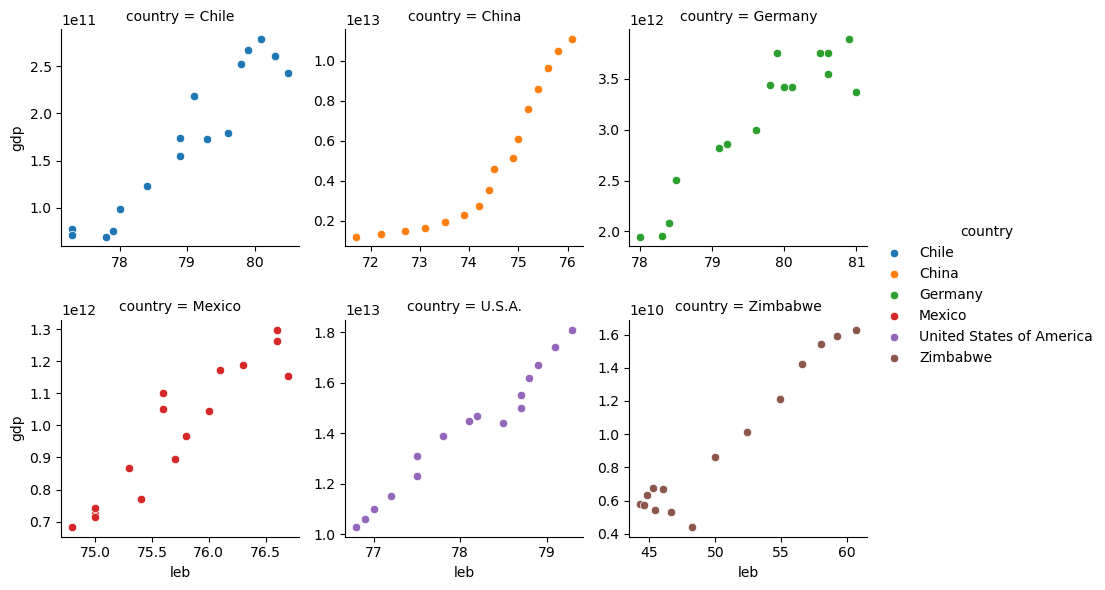

<Figure size 640x480 with 0 Axes>

In [82]:
graphCor = sns.FacetGrid(df, col="country", col_wrap=3,
                         hue="country", sharey=False, sharex=False)
graphCor = (graphCor.map(sns.scatterplot, "leb", "gdp")
            .add_legend()
            )

graphCor.axes[4].set_title("country = U.S.A.", fontsize="medium")

corelations = df.groupby('country').apply(lambda x: x['gdp'].corr(x['leb']))
print(corelations)

plt.show()
plt.clf()

### Q4 and Q5


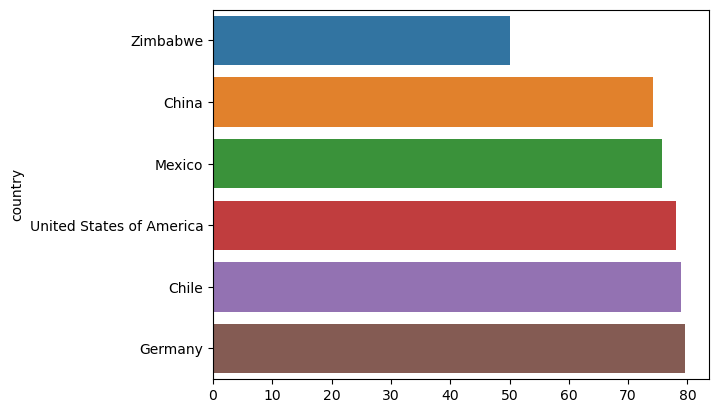

<Figure size 640x480 with 0 Axes>

In [92]:
average_life_expect = df.groupby('country').apply(lambda x: x['leb'].mean())
average_life_expect = average_life_expect.sort_values()

sns.barplot(x=average_life_expect, y=average_life_expect.index, )
plt.show()
plt.clf()

<Axes: xlabel='leb', ylabel='country'>

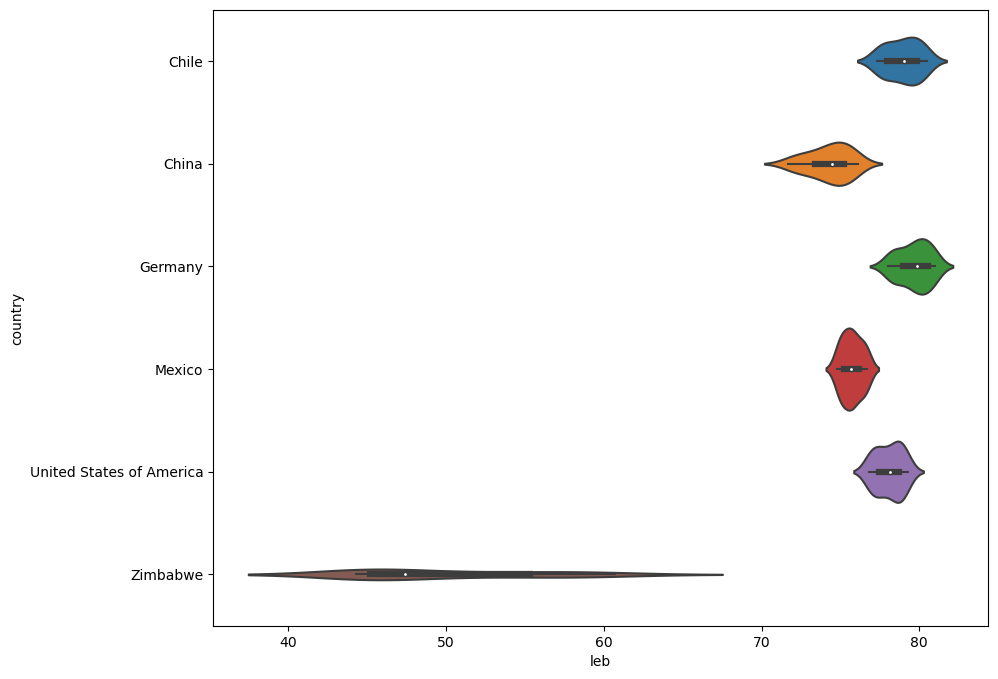

In [97]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x="leb", y="country")

c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gabiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

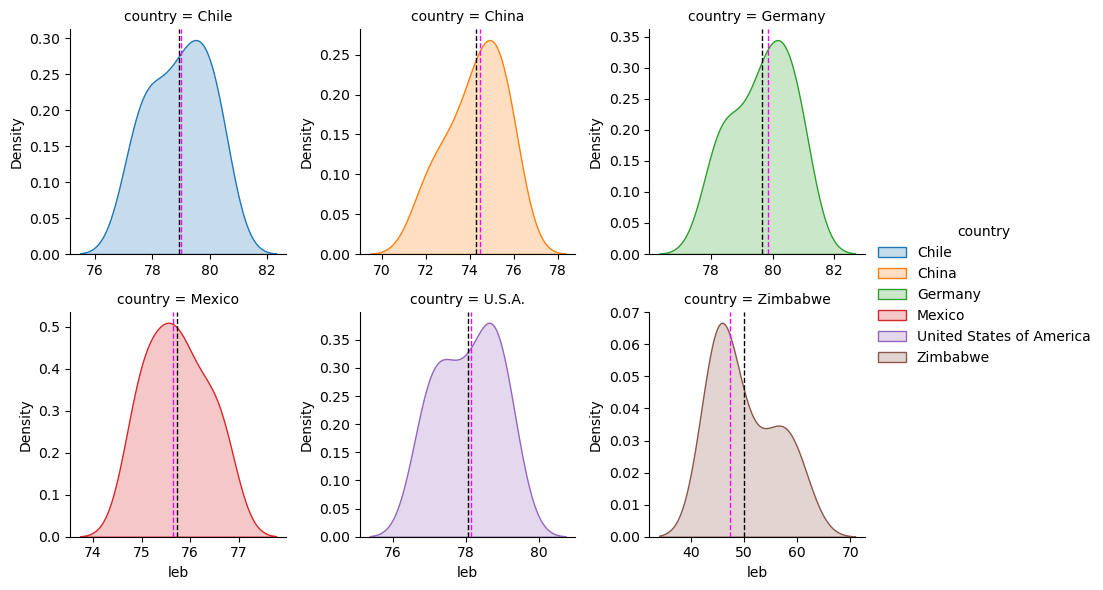

<Figure size 640x480 with 0 Axes>

In [117]:
import matplotlib.lines as mlines

def kde_and_mean_median(x, **kwargs):
    ax = sns.kdeplot(x, fill=True, **kwargs)
    ax.axvline(x.mean(), color='black', linestyle='dashed', linewidth=1)
    ax.axvline(x.median(), color='magenta', linestyle='dashed', linewidth=1)

graphDist = sns.FacetGrid(df, col="country", col_wrap=3,
                         hue="country", sharey=False, sharex=False)
graphDist = (graphDist.map(kde_and_mean_median, "leb")
            .add_legend()
            )

graphDist.axes[4].set_title("country = U.S.A.", fontsize="medium")

plt.show()
plt.clf()


## Interpretions

Life expectancy and GDP both grew in all 6 countries, the growth although varies drastically, the correlation between the two variables for all 6 countries amounted to around 0.9 which is a very strong indicator of positive corelation. Life expectancy for this set of countries is aproximately noramlly distributed. We can also observe that the countries with lower over all gdp values over the past 15 years tend have life expectancy distributions that are slightly left skewed, the inverse appears to also be true for countries with higher over all gdp over the 15 year interval